__Capstone project 1: Predicting Housing prices__

In [1]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\liuz


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


__1. Data Wrangling__

__Step 1. Understanding the data__


In [4]:
df= pd.read_csv ("capstone_project1_train.csv")
test=pd.read_csv ("test.csv")

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
df.shape

(1460, 81)

In [10]:
### Understand the type of columns
df.select_dtypes(include=[np.number]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
df.select_dtypes(include=[np.object]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

__Examine the correlation between the features and the "sale price"__

In [12]:
correlation=df.corr()
print(correlation['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

From the above correlations, 'OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd' are strongly correlated with 'SalePrice' compared to other variables. Specifically, 'OverallQual' and 'GrLivArea' have the strongest correlation with 'SalePrice'. Here, I picked the variables that at least have a absolute correlation with 'Saleprice' of 0.5.

__Examining the correlation among the variables that are highly correlated with 'SalePrice'__

In [15]:
df2=df[['OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']]
df2.corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684,0.790982
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389,0.708624
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622,0.640409
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600,0.623431
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066,0.613581
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379,0.605852
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046,0.560664
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740,0.533723
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855,0.522897
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000,0.507101


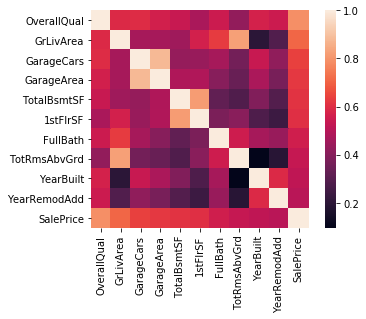

In [16]:
zoomedcorrelation=df2.corr()
sns.heatmap(zoomedcorrelation, square=True)

From the heatmap and the correlation table above, some highly correlated features are identified:
1) 'TotalBsmtSF' is highly correlated with '1stFlrSF' (0.81953)
2) 'GarageArea' is highly correlated with 'GarageCars' (0.882475)
3) 'TotRmsAbvGrd' is highly correlated with 'GrLivArea‘ (0.825489)
4) Top 3 features that are highly correlated with 'SalePrice' are: 'OverallQual', 'GrLivArea' and 'GarageCars'.

__Step2. Identify and remove outliers__

C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


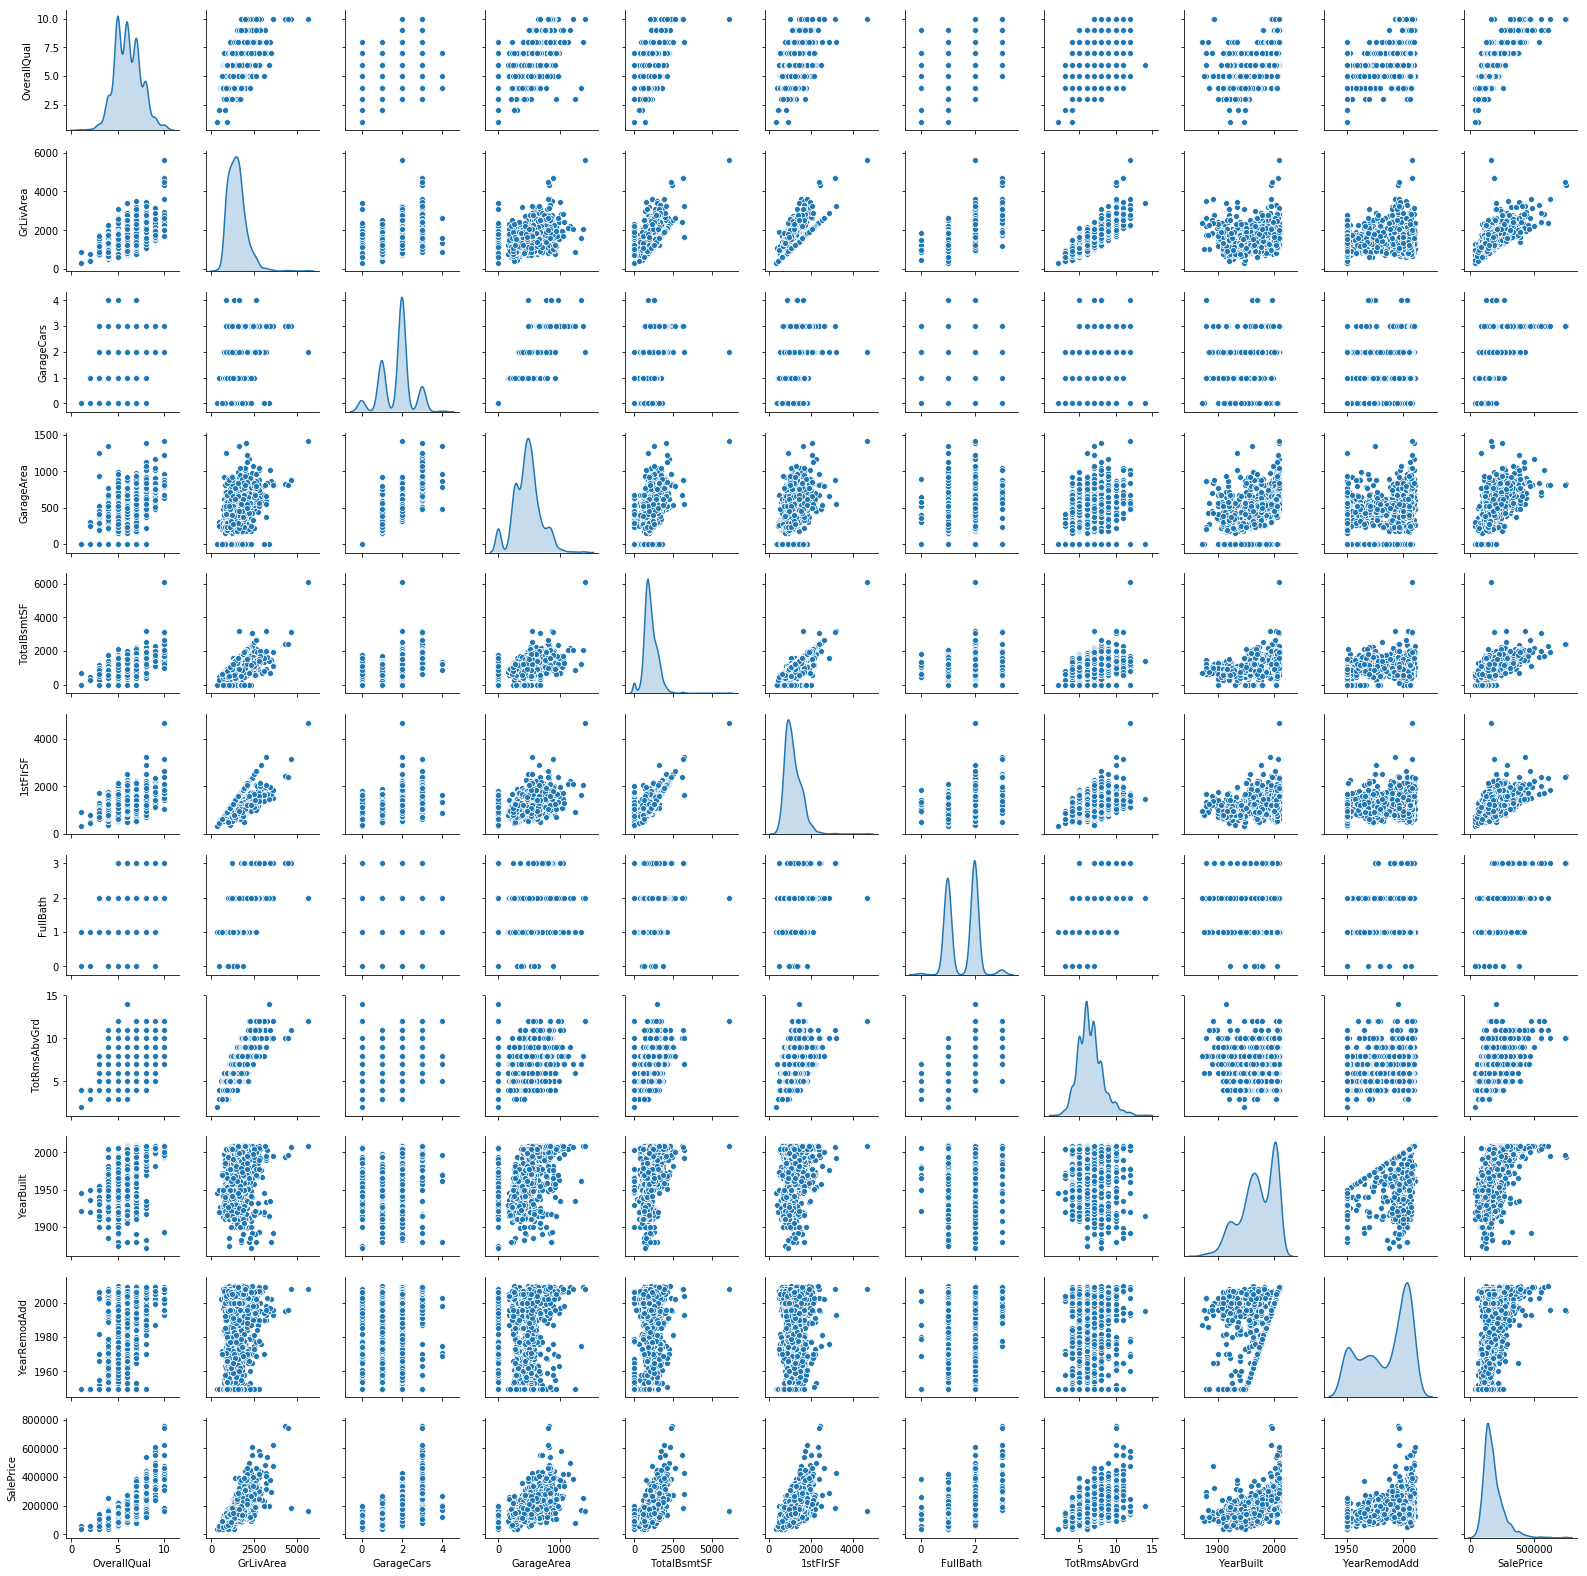

In [17]:
sns.pairplot(df2, size=2, kind='scatter', diag_kind='kde')


From the pairplots above, 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd' seem to have outliers. For a closer look, I am going to make the graphs bigger.

In [18]:
df2.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,180921.195890
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,34900.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,129975.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,163000.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,214000.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,755000.000000


The table above confirms that 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF' probably have outliers since the max value is so much bigger than the 75 percentile value. Whether there is outlier for  'TotRmsAbvGrd', we need to take a closer look of the graph.

Text(0.5,1,'GrlivArea')

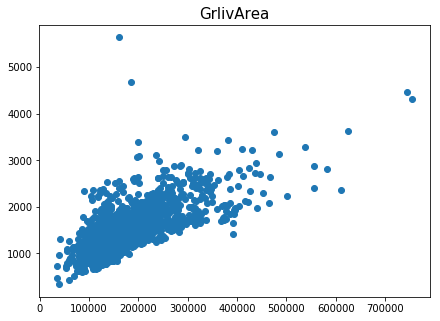

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(y=df.GrLivArea, x=df.SalePrice)
plt.title('GrlivArea', size=15)

In [20]:
df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice']<300000)].index,inplace=True)

Text(0.5,1,'GarageArea')

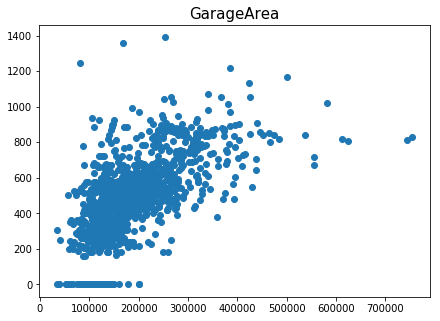

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(y=df.GarageArea, x=df.SalePrice)
plt.title('GarageArea', size=15)

In [22]:
df.drop(df[(df['GarageArea'] > 1200) & (df['SalePrice']<300000)].index,inplace=True)

Text(0.5,1,'TotalBsmtSF')

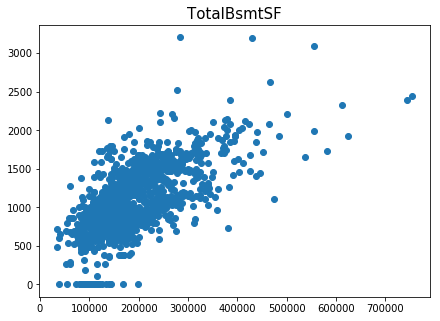

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(y=df.TotalBsmtSF, x=df.SalePrice)
plt.title('TotalBsmtSF', size=15)

In [24]:
df.drop(df[df['TotalBsmtSF'] > 5000].index,inplace=True)

plt.figure(figsize=(7,5))
plt.scatter(y=df['1stFlrSF'], x=df.SalePrice)
plt.title('1stFlrSF', size=15)

In [25]:
df.drop(df[df['1stFlrSF'] > 4000].index,inplace=True)

Text(0.5,1,'TotRmsAbvGrd')

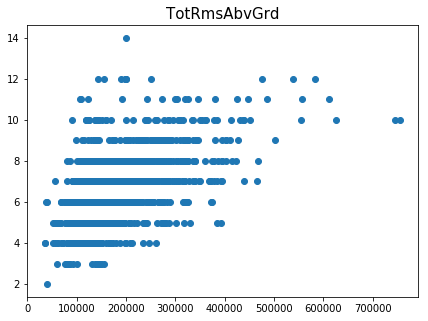

In [26]:
plt.figure(figsize=(7,5))
plt.scatter(y=df.TotRmsAbvGrd, x=df.SalePrice)
plt.title('TotRmsAbvGrd', size=15)

In [27]:
df.drop(df[df['TotRmsAbvGrd'] ==14].index,inplace=True)

__Step3. Imputing missing values__

In [28]:
df.shape

(1454, 81)

In [29]:
df['origindataset']='df'

In [30]:
test['origindataset']='test'

In [31]:
df.shape

(1454, 82)

In [32]:
test.shape

(1459, 81)

Now, combining test set and train set to look at missing values

In [33]:
combineddata=pd.concat([df,test], ignore_index=True)

C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [34]:
combineddata.shape


(2913, 82)

In [35]:
combineddata.isnull().sum().sort_values(ascending=False)

PoolQC           2904
MiscFeature      2809
Alley            2716
Fence            2342
SalePrice        1459
FireplaceQu      1418
LotFrontage       485
GarageFinish      158
GarageQual        158
GarageYrBlt       158
GarageCond        158
GarageType        156
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
BsmtHalfBath        2
Functional          2
Utilities           2
Exterior2nd         1
Electrical          1
Exterior1st         1
GarageArea          1
KitchenQual         1
SaleType            1
                 ... 
YearRemodAdd        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchSF         0
Neighborho

In [36]:
combineddataobject=combineddata.select_dtypes(include=[np.object])
total=combineddataobject.isnull().count().sort_values(ascending=False)
missing_values=combineddataobject.isnull().sum().sort_values(ascending=False)
missing_percent=(missing_values/total).sort_values(ascending=False)
missing_data = pd.concat([missing_values, missing_percent], axis=1,join='outer', keys=['Missing Count', 'Missing Percentage'])
missing_data.index.name='Object Features'
missing_data.head(20)

,Missing Count,Missing Percentage
Object Features,,
PoolQC,2904,0.996910
MiscFeature,2809,0.964298
Alley,2716,0.932372
Fence,2342,0.803982
FireplaceQu,1418,0.486783
GarageCond,158,0.054240
GarageFinish,158,0.054240
GarageQual,158,0.054240
GarageType,156,0.053553


Methods of imputation for categorical variables:
1. If number of missing values is less than 5, use mode to replace missing values
2. If number of missing values is more than 5, use "None" to replace missing values

In [37]:
for col in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageQual','GarageCond','GarageFinish','GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType']:
    combineddata[col].fillna('None',inplace = True)
for col in ['MSZoning','Functional','Utilities','KitchenQual','SaleType','Exterior2nd','Exterior1st','Electrical']:
    combineddata[col].fillna(combineddata[col].mode()[0],inplace= True)


In [38]:
combineddatanumeric=combineddata.select_dtypes(include=[np.number])
total2=combineddatanumeric.isnull().count().sort_values(ascending=False)
missing_values2=combineddatanumeric.isnull().sum().sort_values(ascending=False)
missing_percent2=(missing_values2/total2).sort_values(ascending=False)
missing_data2 = pd.concat([missing_values2, missing_percent2], axis=1,join='outer', keys=['Missing Count', 'Missing Percentage'])
missing_data2.index.name='Numeric Features'
missing_data2.head(20)

,Missing Count,Missing Percentage
Numeric Features,,
SalePrice,1459,0.500858
LotFrontage,485,0.166495
GarageYrBlt,158,0.054240
MasVnrArea,23,0.007896
BsmtHalfBath,2,0.000687
BsmtFullBath,2,0.000687
GarageCars,1,0.000343
TotalBsmtSF,1,0.000343
BsmtFinSF1,1,0.000343


Methods of imputation for numeric variables:
1. If number of missing values is less than 25 (<0.7%), use "mean" to replace missing values
2. If number of missing values is more than 25 (>5%), use "median" to replace missing values

In [40]:
for col in ['MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageArea', 'BsmtUnfSF']:
    combineddata[col].fillna(combineddata[col].mean(),inplace= True)

In [41]:
combineddata[['SalePrice', 'LotFrontage', 'GarageYrBlt']].describe()

,SalePrice,LotFrontage,GarageYrBlt
count,1454.000000,2428.000000,2755.000000
mean,180947.663686,69.151565,1978.076225
std,79536.272456,22.774166,25.576576
min,34900.000000,21.000000,1895.000000
25%,129925.000000,59.000000,1960.000000
50%,163000.000000,68.000000,1979.000000
75%,214000.000000,80.000000,2002.000000
max,755000.000000,313.000000,2207.000000


In [43]:
for col in ['SalePrice', 'LotFrontage', 'GarageYrBlt']:
    combineddata[col].fillna(combineddata[col].median(),inplace= True)

__Correcting Features__


Some numeric variables in the dataset are actually year-correlated, and thus should be transformed into categorical type variables.

In [44]:
combineddata.select_dtypes(include=[np.number]).columns


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [45]:
# Converting numeric features to categorical features
strCols = ['YrSold','YearRemodAdd','YearBuilt','MoSold','MSSubClass','GarageYrBlt']
for i in strCols:
    combineddata[i]=combineddata[i].astype(str)

__Adding features__

1. Some object varaiables in this dataset is actually rating variables to describe the condition as poor, fair, average, excellent. These variables should be changed into integer score.

In [46]:
combineddata.select_dtypes(include=[np.object]).columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'MoSold', 'Neighborhood', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'origindataset'],
      dtype='object')

In [47]:
combineddata["oExterQual"] = combineddata.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combineddata["oExterCond"] = combineddata.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combineddata["oBsmtQual"] = combineddata.BsmtQual.map({'None':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combineddata["oBsmtExposure"] = combineddata.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
combineddata["oHeatingQC"] = combineddata.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combineddata["oKitchenQual"] = combineddata.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combineddata["oFireplaceQu"] = combineddata.FireplaceQu.map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
combineddata["oGarageFinish"] = combineddata.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
combineddata["oPavedDrive"] = combineddata.PavedDrive.map({'N':1, 'P':2, 'Y':3})


2. Some numeric features can be combined to a new variable, for example 1st floor square feet, 2nd square feet and total basement squarefeet can be combined as house square feet.

In [48]:
combineddata['HouseSF'] = combineddata['1stFlrSF'] + combineddata['2ndFlrSF'] + combineddata['TotalBsmtSF']
combineddata['PorchSF'] = combineddata['3SsnPorch'] + combineddata['EnclosedPorch'] + combineddata['OpenPorchSF'] + combineddata['ScreenPorch']
combineddata['TotalSF'] = combineddata['HouseSF'] + combineddata['PorchSF'] + combineddata['GarageArea']
#####Half bath is counted as 0.5 bath
combineddata['totalbath']=combineddata['BsmtFullBath']+ (combineddata['BsmtHalfBath']/2)+combineddata['FullBath']+(combineddata['HalfBath']/2)


In [49]:
combineddata.shape

(2913, 95)

__Splitting the cleaned combined dataset into train and test set__

In [50]:
df.shape

(1454, 82)

In [51]:
test.shape

(1459, 81)

Originally, training set contains almost the same number of observations as the test set. I am here splitting the combined data in a way that the original test set is still the new test set, while the original training set is still the new training set. 

In [52]:
combineddatacopy=combineddata.copy()

In [53]:
combineddata.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,oBsmtExposure,oHeatingQC,oKitchenQual,oFireplaceQu,oGarageFinish,oPavedDrive,HouseSF,PorchSF,TotalSF,totalbath
count,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,...,2913.000000,2913.000000,2913.000000,2913.000000,2913.00000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000
mean,1157.223138,335.828356,2.607621,2.858565,439.132555,49.684409,0.429406,0.061491,560.020261,23.145898,...,2.385170,4.150704,3.510127,2.766564,2.71507,2.831102,2541.888719,89.118435,3102.693966,2.217618
std,385.017430,427.788903,25.213828,0.817840,444.048758,169.335828,0.523894,0.245840,438.738053,64.301832,...,0.693831,0.958056,0.660386,1.806321,0.89671,0.536735,779.723685,107.767744,949.927844,0.807212
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,334.000000,0.000000,334.000000,1.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,2.000000,3.000000,3.000000,1.000000,2.00000,3.000000,2000.000000,0.000000,2432.000000,1.500000
50%,1082.000000,0.000000,0.000000,3.000000,369.000000,0.000000,0.000000,0.000000,467.000000,0.000000,...,2.000000,5.000000,3.000000,2.000000,3.00000,3.000000,2446.000000,50.000000,2987.000000,2.000000
75%,1383.000000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,802.000000,0.000000,...,3.000000,5.000000,4.000000,5.000000,3.00000,3.000000,2990.000000,136.000000,3653.000000,2.500000
max,5095.000000,2065.000000,508.000000,6.000000,4010.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,4.000000,5.000000,5.000000,6.000000,4.00000,3.000000,10190.000000,1207.000000,11828.000000,7.000000


In [54]:
newtest=combineddatacopy.loc[combineddatacopy['origindataset']=='test']
newtrain=combineddatacopy.loc[combineddatacopy['origindataset']=='df']

In [55]:
newtest.shape

(1459, 95)

In [56]:
newtrain.shape

(1454, 95)

__2. Data exploration and storytelling__

1) How Sales Price looks like by MSzoning? MSzoning contains "Agriculture", "Commercial", "Floating Village Residential", "Industrial", "Residential High Density", "Residential low density", "Residential low density park", "Residential Medium density".

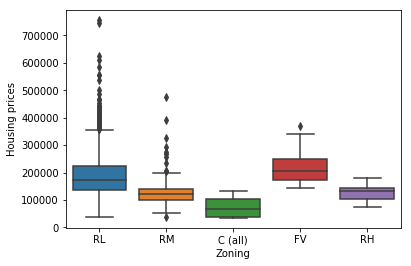

In [57]:
a=sns.boxplot(x='MSZoning', y='SalePrice', data=newtrain)
a=plt.xlabel('Zoning')
a=plt.ylabel('Housing prices')
plt.show()

In [58]:
newtrain.groupby('MSZoning')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
MSZoning,,,,,,,,
C (all),9.0,73808.888889,35759.614502,34900.0,40000.0,68400.0,102776.0,133900.0
FV,65.0,214014.061538,52369.662067,144152.0,174000.0,205950.0,250000.0,370878.0
RH,15.0,126995.600000,31775.927620,76000.0,105300.0,133000.0,145000.0,181000.0
RL,1147.0,191003.231037,80877.995668,39300.0,137500.0,174000.0,224700.0,755000.0
RM,218.0,126316.830275,48521.689833,37900.0,100000.0,120500.0,140000.0,475000.0


The above figure shows that the median housing price for "Floating Village Residential" is the highest. The next highest median housing price is "Residential low density", while the lowet median housing price is "Commercial". The boxplot presents that the housing price for "Floating Village Residential" is more dispersed. The least dispersed housing prices is the "Residential Medium Density". Medium housing prices: FV>RL>RH>RM>C. Mean housing prices: FV>RL>RH>RM>C

2) Next I want to explore how does housing price look like by neighborhood?

In [59]:
group=newtrain.groupby('Neighborhood')['SalePrice'].describe()
group


,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,17.0,194870.882353,30393.229219,159895.0,174000.00,191000.0,213490.00,264561.0
Blueste,2.0,137500.000000,19091.883092,124000.0,130750.00,137500.0,144250.00,151000.0
BrDale,16.0,104493.750000,14330.176493,83000.0,91000.00,106000.0,118000.00,125000.0
BrkSide,58.0,124834.051724,40348.689270,39300.0,100500.00,124300.0,141175.00,223500.0
ClearCr,28.0,212565.428571,50231.538993,130000.0,183750.00,200250.0,242225.00,328000.0
CollgCr,150.0,197965.773333,51403.666438,110000.0,152958.75,197200.0,225725.00,424870.0
Crawfor,51.0,210624.725490,68866.395472,90350.0,159250.00,200624.0,239000.00,392500.0
Edwards,98.0,127318.571429,43142.801433,58500.0,100500.00,119500.0,143375.00,320000.0
Gilbert,79.0,192854.506329,35986.779085,141000.0,174000.00,181000.0,197200.00,377500.0


In [60]:
meanprice=group['mean'].sort_values(ascending=False)
meanprice.index.name='Mean Housing Price'
meanprice

Mean Housing Price
NoRidge    335295.317073
NridgHt    317099.276316
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156025.750000
NAmes      145847.080000
NPkVill    142694.444444
SWISU      140199.333333
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    127318.571429
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100655.000000
MeadowV     98576.470588
Name: mean, dtype: float64

The above shows that on average, the most expensive neighborhood is "NoRidge", followed by "NridgHt", "StoneBr", "Timber" and "Veenker".

3) Does "Month sold" show any pattern in housing prices? This aims to see whether there are some seasonality for the housing market.

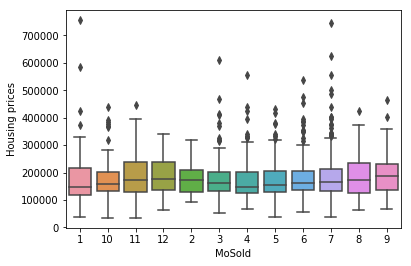

In [61]:
a=sns.boxplot(x='MoSold', y='SalePrice', data=newtrain)
a=plt.xlabel('MoSold')
a=plt.ylabel('Housing prices')
plt.show()

In [62]:
newtrain.groupby('MoSold')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
MoSold,,,,,,,,
1,57.0,183664.263158,122419.915586,39300.0,118000.0,149000.0,216000.00,755000.0
10,88.0,179505.045455,76167.976759,35311.0,134250.0,158500.0,203125.00,438780.0
11,79.0,192210.911392,83517.711202,34900.0,130000.0,173000.0,238500.00,446261.0
12,59.0,186518.966102,69495.155055,62383.0,135480.0,178000.0,239500.00,340000.0
2,52.0,177882.000000,52960.863135,93000.0,129175.0,173250.0,211225.00,320000.0
3,104.0,183239.576923,87295.572218,52500.0,132875.0,163200.0,201134.25,611657.0
4,141.0,171503.262411,77147.323106,68400.0,124000.0,147000.0,202900.00,555000.0
5,204.0,172307.269608,68614.545198,37900.0,127750.0,154000.0,204812.50,430000.0
6,253.0,177395.735178,69453.085881,55993.0,136000.0,163000.0,204000.00,538000.0


The mean housing prices in September and November appear to be higher. To understand whether it is statistically significant, I will do the Hypothesis Testing to explore.

In [63]:
SepNov=newtrain.loc[newtrain['MoSold'].isin(['9', '11'])]
Saleprice1=SepNov['SalePrice']

In [64]:
Othermonth=newtrain.loc[newtrain['MoSold'].isin(['1', '2', '3', '4', '5', '6', '7', '8', '10','12'])]
Saleprice2=Othermonth['SalePrice']

Null hypothesis: mean1=mean2
Alternathesis hypothesis: mean1≠mean2 

In [65]:
from scipy.stats import ttest_ind
ttest_ind(Saleprice1, Saleprice2)


Ttest_indResult(statistic=2.0215897039324773, pvalue=0.04340189017510017)

P value is 0.04, this shows that the difference between the mean housing price for September November and the mean housing price for other months is statistically significant. So seasonality does exist.

4) Want to explore whether garage type makes a difference in housing prices

In [66]:
newtrain.groupby('GarageType')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
GarageType,,,,,,,,
2Types,5.0,147940.000000,37949.545452,87000.0,145000.0,150000.0,171000.0,186700.0
Attchd,868.0,202884.006912,77202.839889,60000.0,149975.0,185000.0,235000.0,755000.0
Basment,19.0,160570.684211,63967.283574,55993.0,132250.0,148000.0,174000.0,359100.0
BuiltIn,87.0,255556.356322,102542.859575,91000.0,180500.0,230000.0,301638.5,582933.0
CarPort,9.0,109962.111111,24638.183681,82000.0,95000.0,108000.0,110000.0,164900.0
Detchd,386.0,134228.704663,41356.622720,35311.0,110000.0,129500.0,147850.0,475000.0
None,80.0,102108.750000,31155.321157,34900.0,82375.0,99950.0,123700.0,200500.0


Buildin and attached garages have very high mean housing price comparing to other types of garage. I will do a hypothesis testing to see whether this is statistically significant.

In [67]:
buildinattach=newtrain.loc[newtrain['GarageType'].isin(['Attchd', 'BuiltIn'])]
Salepricebuildin=buildinattach['SalePrice']

In [68]:
Othergarage=newtrain.loc[newtrain['GarageType'].isin(['2Types', 'Basment', 'CarPort', 'Detchd', 'NA'])]
Salepriceother=Othergarage['SalePrice']

Null hypothesis: mean1=mean2 Alternathesis hypothesis: mean1≠mean2

In [69]:
ttest_ind(Salepricebuildin, Salepriceother)

Ttest_indResult(statistic=17.28378335402658, pvalue=1.039741458445588e-60)

The hypothesis test result shows that the difference between the mean housing prices with buildin and attached garage and the mean housing prices with other garage types is statistically significant.

4) Exploring some correlation between the features and the housing prices. I am specifically interested in the following features: exterior quality, exterior condition, kitchen quality, house square feet, total property squre feet, number of total bathrooms, age of the house, overall quality and overall condition.

Text(0.5,1,'YearBuilt')

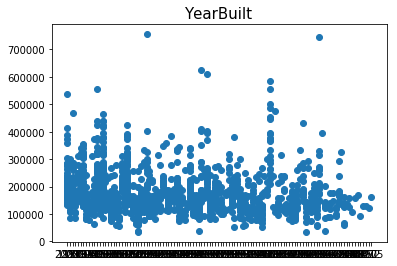

In [70]:
plt.scatter(x=newtrain.YearBuilt, y=newtrain.SalePrice)
plt.title('YearBuilt', size=15)

At different built year, the housing price ranges at all levels, thus the Yearbuilt is not a big factor explaining the housing prices.

In [71]:
cols = ['SalePrice','oExterQual','oExterCond', 'oKitchenQual','HouseSF', 'TotalSF','totalbath','OverallQual', 'OverallCond']
newtrain[cols].describe()

,SalePrice,oExterQual,oExterCond,oKitchenQual,HouseSF,TotalSF,totalbath,OverallQual,OverallCond
count,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
mean,180947.663686,3.394773,3.083219,3.510316,2555.200825,3112.615543,2.208391,6.096286,5.577717
std,79536.272456,0.568380,0.350921,0.660218,772.446562,937.521680,0.781698,1.373859,1.112625
min,34900.000000,2.000000,1.000000,2.000000,334.000000,334.000000,1.000000,1.000000,1.000000
25%,129925.000000,3.000000,3.000000,3.000000,2008.500000,2452.000000,2.000000,5.000000,5.000000
50%,163000.000000,3.000000,3.000000,3.000000,2472.000000,3011.500000,2.000000,6.000000,5.000000
75%,214000.000000,4.000000,3.000000,4.000000,2999.750000,3660.750000,2.500000,7.000000,6.000000
max,755000.000000,5.000000,5.000000,5.000000,6872.000000,7763.000000,6.000000,10.000000,9.000000


In [72]:
sns.set()
correlation=newtrain[cols].corr()
print(correlation['SalePrice'].sort_values(ascending = False))

SalePrice       1.000000
TotalSF         0.852270
HouseSF         0.834105
OverallQual     0.796033
oExterQual      0.688612
oKitchenQual    0.663635
totalbath       0.635469
oExterCond      0.019202
OverallCond    -0.079445
Name: SalePrice, dtype: float64


Doing the Hypothesis test to see whether the correlation with the feature and House Sale Price is statistically significant.

In [73]:
r=correlation['SalePrice']
n=1454
df=n-2
print(r)

SalePrice       1.000000
oExterQual      0.688612
oExterCond      0.019202
oKitchenQual    0.663635
HouseSF         0.834105
TotalSF         0.852270
totalbath       0.635469
OverallQual     0.796033
OverallCond    -0.079445
Name: SalePrice, dtype: float64


In [74]:
t=(r*((n-2)**0.5)/((1-r**2)**0.5))
import scipy.stats as stats
p_value=stats.t.sf(np.abs(t), df)*2
print(p_value)

[0.00000000e+000 6.40159998e-205 4.64399979e-001 2.82687507e-185
 0.00000000e+000 0.00000000e+000 2.75949802e-165 6.20506926e-319
 2.43324094e-003]


Given the hypothesis test results above, all the p-values of the feature shows the correlation between the feature and housing price is statistically significant. Thus, housing prices is highly correlated with (absolute r>0.5) exterior quality, exterior condition, kitchen quality, house square feet, property square feet, total number of bathrooms, and overall quality. Specially the most correlated three features are total property square feet, house square feet and overal quality.

__3. Exploring predictive modeling methods.__

Before using any ML techniques, the Label Encoder is used first to convert categorical data into numeric data. Then, the One Hot Encoder is used to create dummy variables for certain features

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder, Imputer
from scipy.stats import skew

# Label encoding class
class labenc(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        label = LabelEncoder()
        X['YrSold']=label.fit_transform(X['YrSold'])
        X['YearRemodAdd']=label.fit_transform(X['YearRemodAdd'])
        X['YearBuilt']=label.fit_transform(X['YearBuilt'])
        X['MoSold']=label.fit_transform(X['MoSold'])
        X['GarageYrBlt']=label.fit_transform(X['GarageYrBlt'])
        return X
    
# Skewness transform class
class skewness(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        skewness = X.select_dtypes(include=[np.number]).apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= 1].index
        X[skewness_features] = np.log1p(X[skewness_features])
        return X

# One hot encoding class
class onehotenc(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X = pd.get_dummies(X)
        return X
combineddatacopy=combineddata.copy()
# Creating a new fata with aplied transformations using sklearn Pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('labenc',labenc()),('skewness',skewness()),('onehotenc',onehotenc())])
dataPipeline = pipeline.fit_transform(combineddatacopy)
dataPipeline.shape 

(2913, 333)

In [82]:
newtest_encode=dataPipeline.loc[dataPipeline['origindataset_test']==1]
newtrain_encode=dataPipeline.loc[dataPipeline['origindataset_df']==1]

In [83]:
X_train_encode=newtrain_encode.drop(columns="SalePrice")
X_train_encode.shape

(1454, 332)

In [84]:
y_train_encode=newtrain_encode['SalePrice']
y_train_encode.shape

(1454,)

In [85]:
X_test_encode=newtest_encode.drop(columns="SalePrice")
X_test_encode.shape

(1459, 332)

Transform y into normal distribution; use RobustScaler to transform the features.

In [95]:
y_train_trans= np.log(y_train_encode)
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_trans=scaler.fit(X_train_encode).transform(X_train_encode)
X_train_trans.shape, y_train_trans.shape

((1454, 332), (1454,))

In [96]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_test_trans=scaler.fit(X_test_encode).transform(X_test_encode)
X_test_trans.shape

(1459, 332)

Use PCA to reduce features.

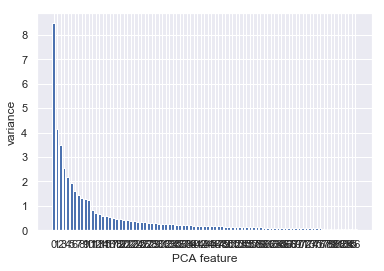

In [97]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a PCA instance: pca
pca = PCA(0.95)
combineddatascaled = np.concatenate([X_train_trans,X_test_trans])
combineddata_pca= pca.fit_transform(combineddatascaled) 
#Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [98]:
combineddata_pca.shape

(2913, 87)

In [99]:
X_train_pca=combineddata_pca[:1454]
X_test_pca=combineddata_pca[1454:]

In [100]:
X_train_pca.shape

(1454, 87)

In [101]:
X_test_pca.shape

(1459, 87)

After reducing the features, the final data has 87 features.

__1) Supervised learning: Linear regression, Elastic Net, Lasso, Ridge regression, SVR and Gradient boosting__


In [102]:
# importing the models
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, Lasso, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR,SVR
# creating the models
models = [
             LinearRegression(),
             SVR(),
             GradientBoostingRegressor(),
             Lasso(),
             Lasso(alpha=0.01,max_iter=10000),
             Ridge(),
             BayesianRidge(),
             KernelRidge(),
             KernelRidge(alpha=0.6,kernel='polynomial',degree = 2,coef0=2.5),
             ElasticNet(),
             ElasticNet(alpha = 0.001,max_iter=10000),    
             ]

names = ['Linear regression','Support vector regression', 'Gradient boosting tree','Lasso regression','Lasso regression 2','Ridge regression','Bayesian ridge regression','Kernel ridge regression','Kernel ridge regression 2','Elastic net regularization','Elastic net regularization 2']

In [106]:
# Define a root mean square error function
def rmse(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5))
    return rmse
from sklearn.model_selection import KFold, cross_val_score
# Perform 5-folds cross-calidation to evaluate the models 
for model, name in zip(models, names):
    # Root mean square error
    score = rmse(model,X_train_pca,y_train_trans)
    print("- {} : mean : {:.6f}, std : {:4f}".format(name, score.mean(),score.std()))

- Linear regression : mean : 0.009906, std : 0.000378
- Support vector regression : mean : 0.030622, std : 0.002065
- Gradient boosting tree : mean : 0.011265, std : 0.000391
- Lasso regression : mean : 0.033205, std : 0.001342
- Lasso regression 2 : mean : 0.014733, std : 0.000673
- Ridge regression : mean : 0.009899, std : 0.000379
- Bayesian ridge regression : mean : 0.009830, std : 0.000392
- Kernel ridge regression : mean : 0.808388, std : 0.044143
- Kernel ridge regression 2 : mean : 0.009751, std : 0.000386
- Elastic net regularization : mean : 0.033205, std : 0.001342
- Elastic net regularization 2 : mean : 0.010908, std : 0.000516


The above 'mean' means the mean of Root Mean Square Error sample. The RMSE serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSE is a measure of accuracy, to compare forecasting errors of different models for a particular dataset and not between datasets, as it is scale-dependent. In general, a lower RMSE is better than a higher one. However, comparisons across different types of data would be invalid because the measure is dependent on the scale of the numbers used.

By compiling the above code several times and observing the different scores each time, we can classify the models by accuracy: 
 1st: Kernal Ridge Regression 2
 2nd: Bayesian Ridge Regression
 3rd: Ridge Regression
 4th: Linear Regression
 5th: Elastic Net Regularization 2
 6th: Gradient Boosting Tree
 7th: Lasso Regression 2


__Hyper-parameter Tuning__

In [110]:
from sklearn.model_selection import GridSearchCV

class gridSearch():
    def __init__(self,model):
        self.model = model
    def grid_get(self,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5,scoring='neg_mean_squared_error')
        grid_search.fit(X_train_pca,y_train_trans)
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])
        print('\nBest parameters : {}, best score : {}'.format(grid_search.best_params_,np.sqrt(-grid_search.best_score_)))

1. Kernel Ridge Regression

In [111]:
gridSearch(KernelRidge()).grid_get(
        {'alpha':[3.5,4,4.5,5,5.5,6,6.5], 'kernel':["polynomial"], 'degree':[3],'coef0':[1,1.5,2,2.5,3,3.5]})

                                               params  mean_test_score  \
0   {'alpha': 3.5, 'coef0': 1, 'degree': 3, 'kerne...         0.021489   
1   {'alpha': 3.5, 'coef0': 1.5, 'degree': 3, 'ker...         0.011978   
2   {'alpha': 3.5, 'coef0': 2, 'degree': 3, 'kerne...         0.010251   
3   {'alpha': 3.5, 'coef0': 2.5, 'degree': 3, 'ker...         0.009900   
4   {'alpha': 3.5, 'coef0': 3, 'degree': 3, 'kerne...         0.009841   
5   {'alpha': 3.5, 'coef0': 3.5, 'degree': 3, 'ker...         0.009855   
6   {'alpha': 4, 'coef0': 1, 'degree': 3, 'kernel'...         0.022919   
7   {'alpha': 4, 'coef0': 1.5, 'degree': 3, 'kerne...         0.012326   
8   {'alpha': 4, 'coef0': 2, 'degree': 3, 'kernel'...         0.010329   
9   {'alpha': 4, 'coef0': 2.5, 'degree': 3, 'kerne...         0.009905   
10  {'alpha': 4, 'coef0': 3, 'degree': 3, 'kernel'...         0.009821   
11  {'alpha': 4, 'coef0': 3.5, 'degree': 3, 'kerne...         0.009825   
12  {'alpha': 4.5, 'coef0': 1, 'degree

C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, *

2. Elastic Net Regularization

In [112]:
gridSearch(ElasticNet()).grid_get(
        {'alpha':[0.006,0.0065,0.007,0.0075,0.008],'l1_ratio':[0.070,0.075,0.080,0.085,0.09,0.095],'max_iter':[10000]})

                                               params  mean_test_score  \
0   {'alpha': 0.006, 'l1_ratio': 0.07, 'max_iter':...         0.010767   
1   {'alpha': 0.006, 'l1_ratio': 0.075, 'max_iter'...         0.010832   
2   {'alpha': 0.006, 'l1_ratio': 0.08, 'max_iter':...         0.010892   
3   {'alpha': 0.006, 'l1_ratio': 0.085, 'max_iter'...         0.010948   
4   {'alpha': 0.006, 'l1_ratio': 0.09, 'max_iter':...         0.011004   
5   {'alpha': 0.006, 'l1_ratio': 0.095, 'max_iter'...         0.011060   
6   {'alpha': 0.0065, 'l1_ratio': 0.07, 'max_iter'...         0.010844   
7   {'alpha': 0.0065, 'l1_ratio': 0.075, 'max_iter...         0.010907   
8   {'alpha': 0.0065, 'l1_ratio': 0.08, 'max_iter'...         0.010968   
9   {'alpha': 0.0065, 'l1_ratio': 0.085, 'max_iter...         0.011028   
10  {'alpha': 0.0065, 'l1_ratio': 0.09, 'max_iter'...         0.011089   
11  {'alpha': 0.0065, 'l1_ratio': 0.095, 'max_iter...         0.011147   
12  {'alpha': 0.007, 'l1_ratio': 0.07,

C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, *

3. Lasso Regression

In [113]:
gridSearch(Lasso()).grid_get(
       {'alpha':[0.01,0.001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009],'max_iter':[10000]})

                                  params  mean_test_score  std_test_score
0     {'alpha': 0.01, 'max_iter': 10000}         0.014748        0.000020
1    {'alpha': 0.001, 'max_iter': 10000}         0.011575        0.000012
2   {'alpha': 0.0001, 'max_iter': 10000}         0.009852        0.000008
3   {'alpha': 0.0002, 'max_iter': 10000}         0.010096        0.000009
4   {'alpha': 0.0003, 'max_iter': 10000}         0.010412        0.000010
5   {'alpha': 0.0004, 'max_iter': 10000}         0.010709        0.000010
6   {'alpha': 0.0005, 'max_iter': 10000}         0.010919        0.000011
7   {'alpha': 0.0006, 'max_iter': 10000}         0.011107        0.000012
8   {'alpha': 0.0007, 'max_iter': 10000}         0.011261        0.000012
9   {'alpha': 0.0008, 'max_iter': 10000}         0.011389        0.000012
10  {'alpha': 0.0009, 'max_iter': 10000}         0.011490        0.000012

Best parameters : {'alpha': 0.0001, 'max_iter': 10000}, best score : 0.009851746694552115


C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, *

4. Ridge Regression

In [114]:
gridSearch(Ridge()).grid_get(
        {'alpha':[10,20,25,30,35,40,45,50,55,57,60,65,70,75,80,100],'max_iter':[10000]})

                               params  mean_test_score  std_test_score
0    {'alpha': 10, 'max_iter': 10000}         0.009860        0.000008
1    {'alpha': 20, 'max_iter': 10000}         0.009834        0.000008
2    {'alpha': 25, 'max_iter': 10000}         0.009827        0.000008
3    {'alpha': 30, 'max_iter': 10000}         0.009823        0.000008
4    {'alpha': 35, 'max_iter': 10000}         0.009821        0.000008
5    {'alpha': 40, 'max_iter': 10000}         0.009822        0.000008
6    {'alpha': 45, 'max_iter': 10000}         0.009824        0.000008
7    {'alpha': 50, 'max_iter': 10000}         0.009828        0.000008
8    {'alpha': 55, 'max_iter': 10000}         0.009833        0.000008
9    {'alpha': 57, 'max_iter': 10000}         0.009835        0.000008
10   {'alpha': 60, 'max_iter': 10000}         0.009839        0.000008
11   {'alpha': 65, 'max_iter': 10000}         0.009846        0.000008
12   {'alpha': 70, 'max_iter': 10000}         0.009853        0.000008
13   {

C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\liuz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, *

In [116]:
lasso=Lasso(alpha=0.0001, max_iter= 10000)
ker=KernelRidge(alpha=6.5, kernel='polynomial', degree=3, coef0=3.5)
ela= ElasticNet(alpha=0.006, l1_ratio=0.07, max_iter=10000)
bay=BayesianRidge()
gradient=GradientBoostingRegressor()
ridge= Ridge(alpha=35, max_iter=10000)
lr=LinearRegression()

Stacking the models

In [118]:
 ##Creating the stacking function
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        kff = KFold(n_splits=5, random_state=42, shuffle=True)
        self.kf = kff
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [119]:
X_scaled_imputed= Imputer().fit_transform(X_train_pca)
y_log_imputed= Imputer().fit_transform(y_train_trans.values.reshape(-1,1)).ravel()

In [121]:
stack_model=stacking(mod=[lasso,ridge,ker,ela,gradient,lr,bay], meta_model=ker)
score=rmse(stack_model, X_scaled_imputed, y_log_imputed)
print(score.mean())

0.009827354763359341


In [122]:
###Combining the extracted features generated from stacking with original features
X_train_stack,X_test_stack = stack_model.get_oof(X_scaled_imputed,y_log_imputed,X_test_pca)
X_train_add = np.hstack((X_scaled_imputed,X_train_stack))
X_test_add = np.hstack((X_test_pca,X_test_stack))
X_train_add.shape,X_test_add.shape

((1454, 94), (1459, 94))

In [123]:
score=rmse(stack_model,X_train_add, y_log_imputed)
print(score.mean())

0.009326856196443394


__Making predictions__

In [125]:
stack_model.fit(X_train_add, y_log_imputed)
predicted_prices= np.exp(stack_model.predict(X_test_add))
predicted_file= pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
predicted_file.to_csv('predicted_file.csv', index=False)